<a href="https://colab.research.google.com/github/igor531205/data_science/blob/main/lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Представление и интерпретация моделей машинного обучения. Линейная регрессия.

---

Проведите исследование набора данных о [страховых выплатах семьям](https://www.kaggle.com/datasets/mirichoi0218/insurance/data).

Задача 1. Постройте линейную регрессию, в которой ключевой
переменной является размер страховых выплат, а остальные
переменные набора данных — предикторами (регрессанд лучше
прологарифмировать);

Задача 2. Представьте интерпретацию коэффициентов регресии в форме «если
значение предиктора изменяется на 1, то значение ключевого признака
изменяется на ... »;

Задача 3. Представьте описание качества подгонки регрессии, основанное на коэффициенте детерминации и F–статистике;

Задача 4. Представьте анализ остатков регрессии (графики и краткая
интерпретация).

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

# отключаем предупреждения
warn.filterwarnings('ignore')

*Загружаем данные по ссылке*



In [89]:
# ссылка на датасет
link = 'https://raw.githubusercontent.com/igor531205/data_science/main/datasets/medical_cost.csv'

# Считываем данные
df=pd.read_csv(link, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
df.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Выведем сводную информацию о DataFrame*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Выведем все столбцы*

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Columns:
* age: age of primary beneficiary;
* sex: insurance contractor gender, female, male;
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9;
* children: Number of children covered by health insurance / Number of dependents;
* smoker: Smoking;
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest;
* charges: Individual medical costs billed by health insurance.

*Выведем информацию по количественным признакам*

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*Выведем размеры таблицы (кол-во строк, кол-во столбцов)*

In [6]:
df.shape

(1338, 7)

*Выведем гистограммы частот непрерывных признаков*

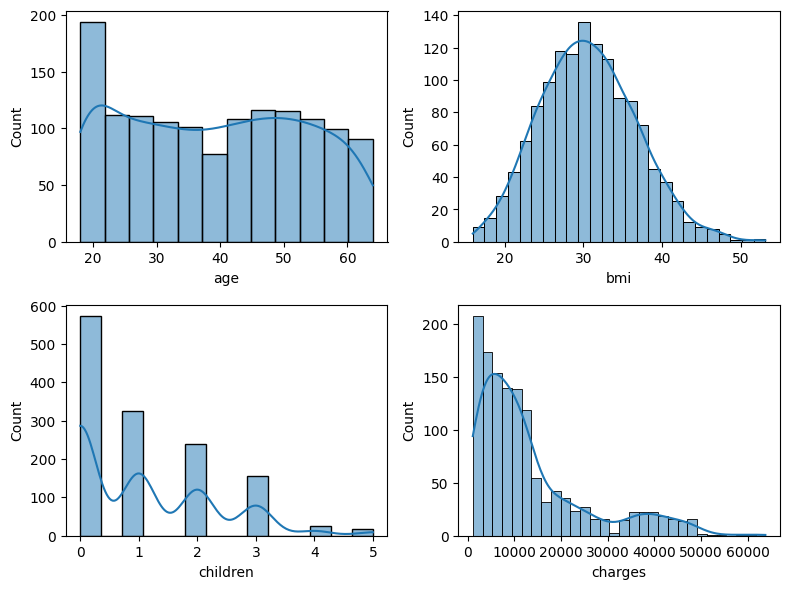

In [7]:
# Количественные признаки в датасете
features = ['age', 'bmi', 'children', 'charges']

# Создание гистограмм для каждого признака
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=ax[i])

plt.tight_layout()
plt.show()

*Выведем влияние курения и пола на страховые взносы*

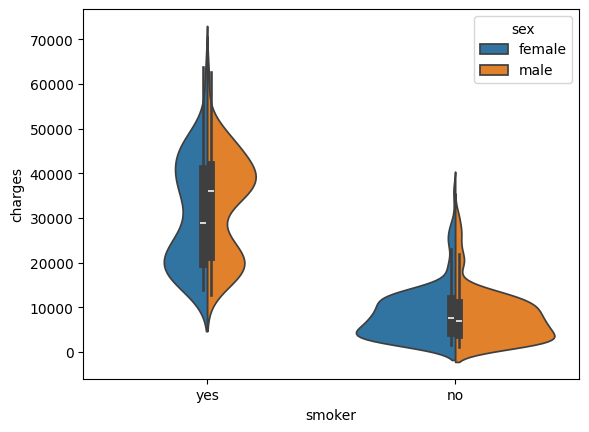

In [8]:
ax = sns.violinplot(data=df, x='smoker', y="charges", hue='sex', split=True)
plt.show()

*Выведем влияние индекса массы тела на страховые взносы*

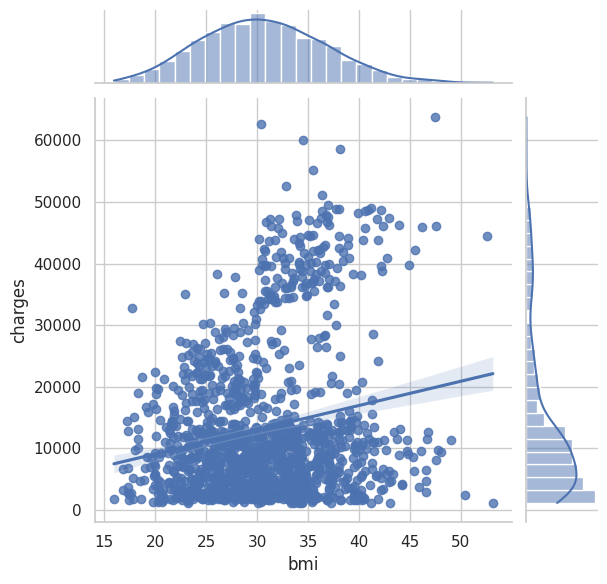

In [65]:
sns.jointplot(x='bmi', y='charges', data=df, kind='reg')
plt.show()

*Выведем влияние индекса массы тела на страховые взносы с разделением по признаку курение*

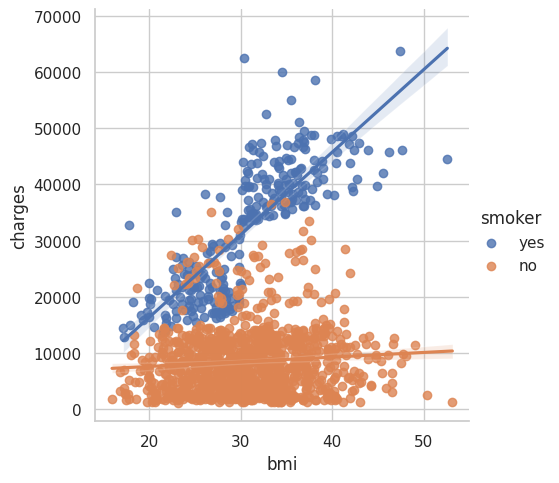

In [66]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.show()

Анализ влияния индекса массы тела на страховые взносы:

> Особое влияние на сумму страховых взносов оказывает индекс массы тела курящих людей.

> Страховые взносы не курящих людей увеличиваются не значительно с увеличением индекса массы тела.

*Выведем влияние возраста на страховые взносы*

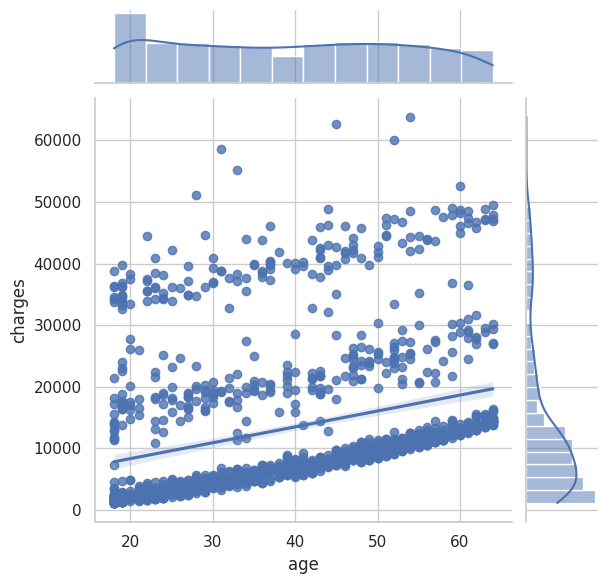

In [67]:
sns.jointplot(x='age', y='charges', data=df, kind='reg')
plt.show()

*Выведем влияние возраста на страховые взносы с разделением по признаку курение*

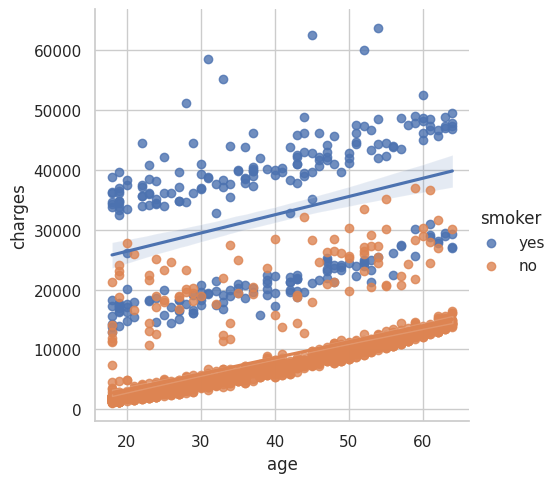

In [68]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.show()

Анализ влияния возраста на страховые взносы:

> С увеличением возраста страховые взносы увеличиваются (независимо от признака курение).

*Конвертируем категориальные данные в числовой формат*

In [90]:
df['sex'].replace(to_replace=['female','male'],value=[0,1],inplace=True)
df['smoker'].replace(to_replace=['no','yes'],value=[0,1],inplace=True)
df['region'].replace(to_replace=np.unique(df.region),value=[0,1,2,3],inplace=True)

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


*Построим матрицу корреляций*

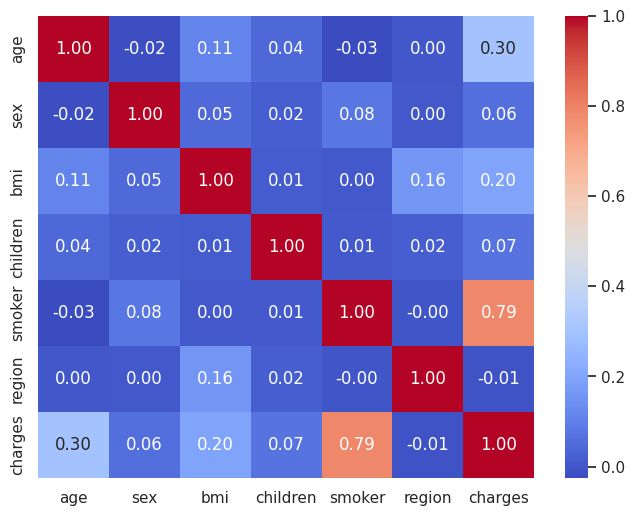

In [70]:
# Расчет корреляций
correlation_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Анализ матрицы корреляции:

> Между возрастом (age) и страховыми взносами (charges) наблюдается корреляция с коэффициентом 0.3, что указывает на небольшую зависимость страховых взносов от возраста.

> Корреляция между индексом массы тела (bmi) и страховыми взносами (charges) составляет 0.2, что свидетельствует о слабой связи между индексом массы тела и страховыми взносами.

> Между количеством детей (children), полом (sex), регионом проживания (region) и страховыми взносами (charges) корреляция практически отсутствует.

> Особое влияние на сумму страховых взносов оказывает курение, что связано с более высокими рисками.

*Подготовка данных для модели линейной регрессии*

In [91]:
# Логарифмирование переменной 'charges'
df['log_charges'] = np.log(df['charges'])

# Определение X и y
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

# Разделение данных на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Обучение модели линейной регрессии*

In [92]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

*Визуализируем реальные и предсказанные значения модели линейной регрессии*

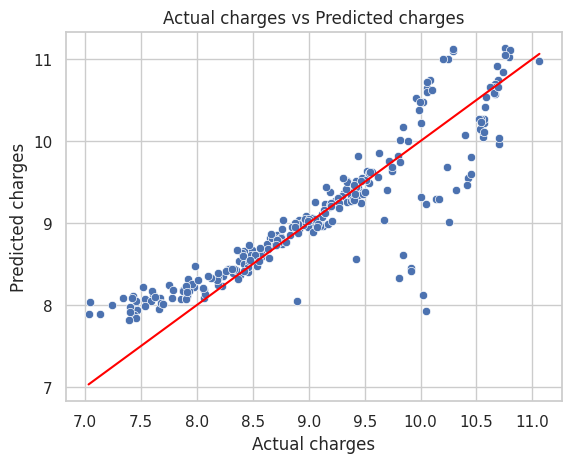

In [101]:
# Визуализация реальных и предсказанных значений
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs Predicted charges')
plt.show()

*Получение коэффициентов модели*

In [94]:
# Вывод коэффициентов модели
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coefficients

,Coefficient
age,0.034304
sex,-0.074011
bmi,0.012831
children,0.092679
smoker,1.549078
region,-0.044351


Интерпретация коэффициентов регресии

*   Возраст (age): увеличение возраста на 1 год связано с увеличением стоимости медицинских услуг на 3.4%;
*   Индекс массы тела (bmi): увеличение bmi на 1 единицу приводит к увеличению стоимости медицинских услуг на 1.3%;
*   Количество детей (children): появление ребенка увеличивает стоимость медицинских услуг на 9.3%;
*   Курение (smoker): курящие платят на 155% больше.

*Вычисление коэффициента детерминации и среднеквадратичной ошибки*

In [93]:
# Вычисление коэффициента детерминации
r2 = r2_score(y_test, y_pred)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)

# Вывод результата
print(f'{r2=}, {mse=}')

r2=0.8025197916136614, mse=0.17756248562721857


*Вычисление F–статистики*

In [117]:
# Расчет F-статистики и соответствующих p-значений для предикторов модели
F_statistic, p_values = f_regression(X, y)

F_statistic_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': F_statistic,
    'p-value': p_values
})

F_statistic_df

,Feature,F-statistic,p-value
0,age,515.977081,7.477385e-97
1,sex,0.042376,8.369353e-01
2,bmi,23.936469,1.116677e-06
3,children,35.704670,2.940691e-09
4,smoker,1062.123923,6.307646e-172
5,region,2.439165,1.185761e-01


Описание качества регрессии

> Для построенной модели коэффициент детерминации 0.8, таким образом, регрессия объясняет большую часть вариабельности ключевой переменной стоимости страховых взносов.

> F-статистики подтверждают сделанные ранее выводы о значимом влиянии признаков "smoker" и "age". Также небольшое влияние оказывают "bmi" и "children	".

*Вычисление остатков регрессии*

In [119]:
# Рассчитаем остатки регрессии
residuals = y_test - y_pred

*Визуализируем остатки модели линейной регрессии*

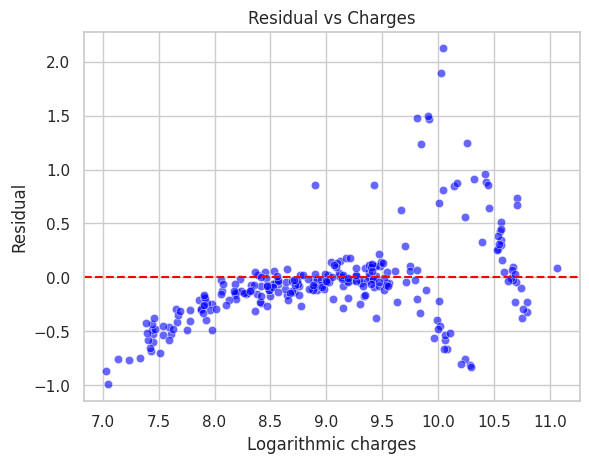

In [128]:
# График остатков
sns.scatterplot(x=y_test, y=residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual vs Charges')
plt.xlabel('Logarithmic charges')
plt.ylabel('Residual')
plt.show()

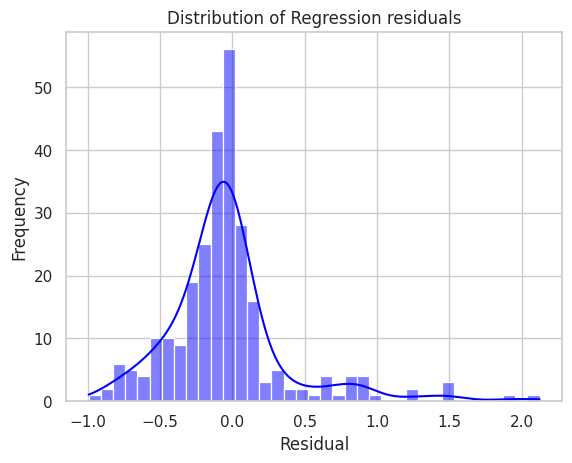

In [132]:
# Гистограмма распределения остатков
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Regression residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

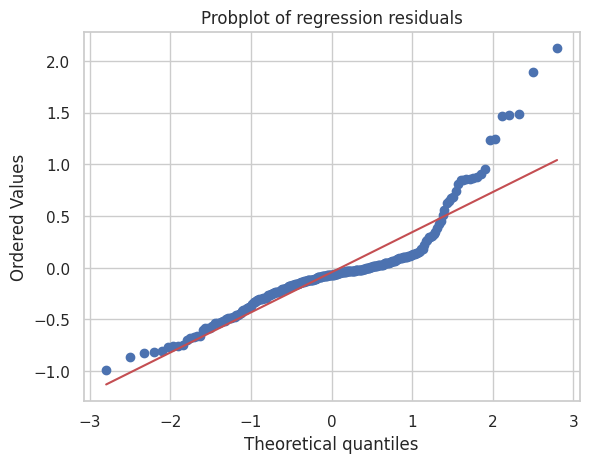

In [136]:
# Probplot для остатков
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Probplot of regression residuals')
plt.show()

Анализ остатков регрессии

> Распределение остатков модели близко к нормальному. В конце графика наблюдаются отклонения гомоскедастичности остатков.